In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Read the data in the file 'housing.csv' into a data frame and look at the first few lines .

In [2]:
housingDf = pd.read_csv("housing.csv")
housingDf.head()

,Longitude,Latitude,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,SalePrice
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


#### You can find documentation for this dataset in the California Housing dataset textfile. Open the file and try to understand what the variables represent. When you have finished you can get info from the data frame and continue your work.

In [3]:
print(housingDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitude   20640 non-null  float64
 1   Latitude    20640 non-null  float64
 2   HouseAge    20640 non-null  int64  
 3   AveRooms    20640 non-null  int64  
 4   AveBedrms   20433 non-null  float64
 5   Population  20640 non-null  int64  
 6   AveOccup    20640 non-null  int64  
 7   MedInc      20640 non-null  float64
 8   SalePrice   20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB
None


#### Are there any missing entries? Where?

#### we can see that we are missing the SalePrice column in the txt file and we can see that wee have a few missiong datapoints in aveBedrms

#### Since all the variables are numeric calculate descriptive statistics for all the columns.

In [4]:
print(housingDf.describe())

          Longitude      Latitude      HouseAge      AveRooms     AveBedrms  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20433.000000   
mean    -119.569704     35.631861     28.639486   2635.763081    537.870553   
std        2.003532      2.135952     12.585558   2181.615252    421.385070   
min     -124.350000     32.540000      1.000000      2.000000      1.000000   
25%     -121.800000     33.930000     18.000000   1447.750000    296.000000   
50%     -118.490000     34.260000     29.000000   2127.000000    435.000000   
75%     -118.010000     37.710000     37.000000   3148.000000    647.000000   
max     -114.310000     41.950000     52.000000  39320.000000   6445.000000   

         Population      AveOccup        MedInc      SalePrice  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean    1425.476744    499.539680      3.870671  206855.816909  
std     1132.462122    382.329753      1.899822  115395.615874  
min        3.000000      1.0

 ### Exploratory Data Analysis

#### Make histograms for each column of the dataset. (Pandas can do it easily in one line, just make it big enough to see).

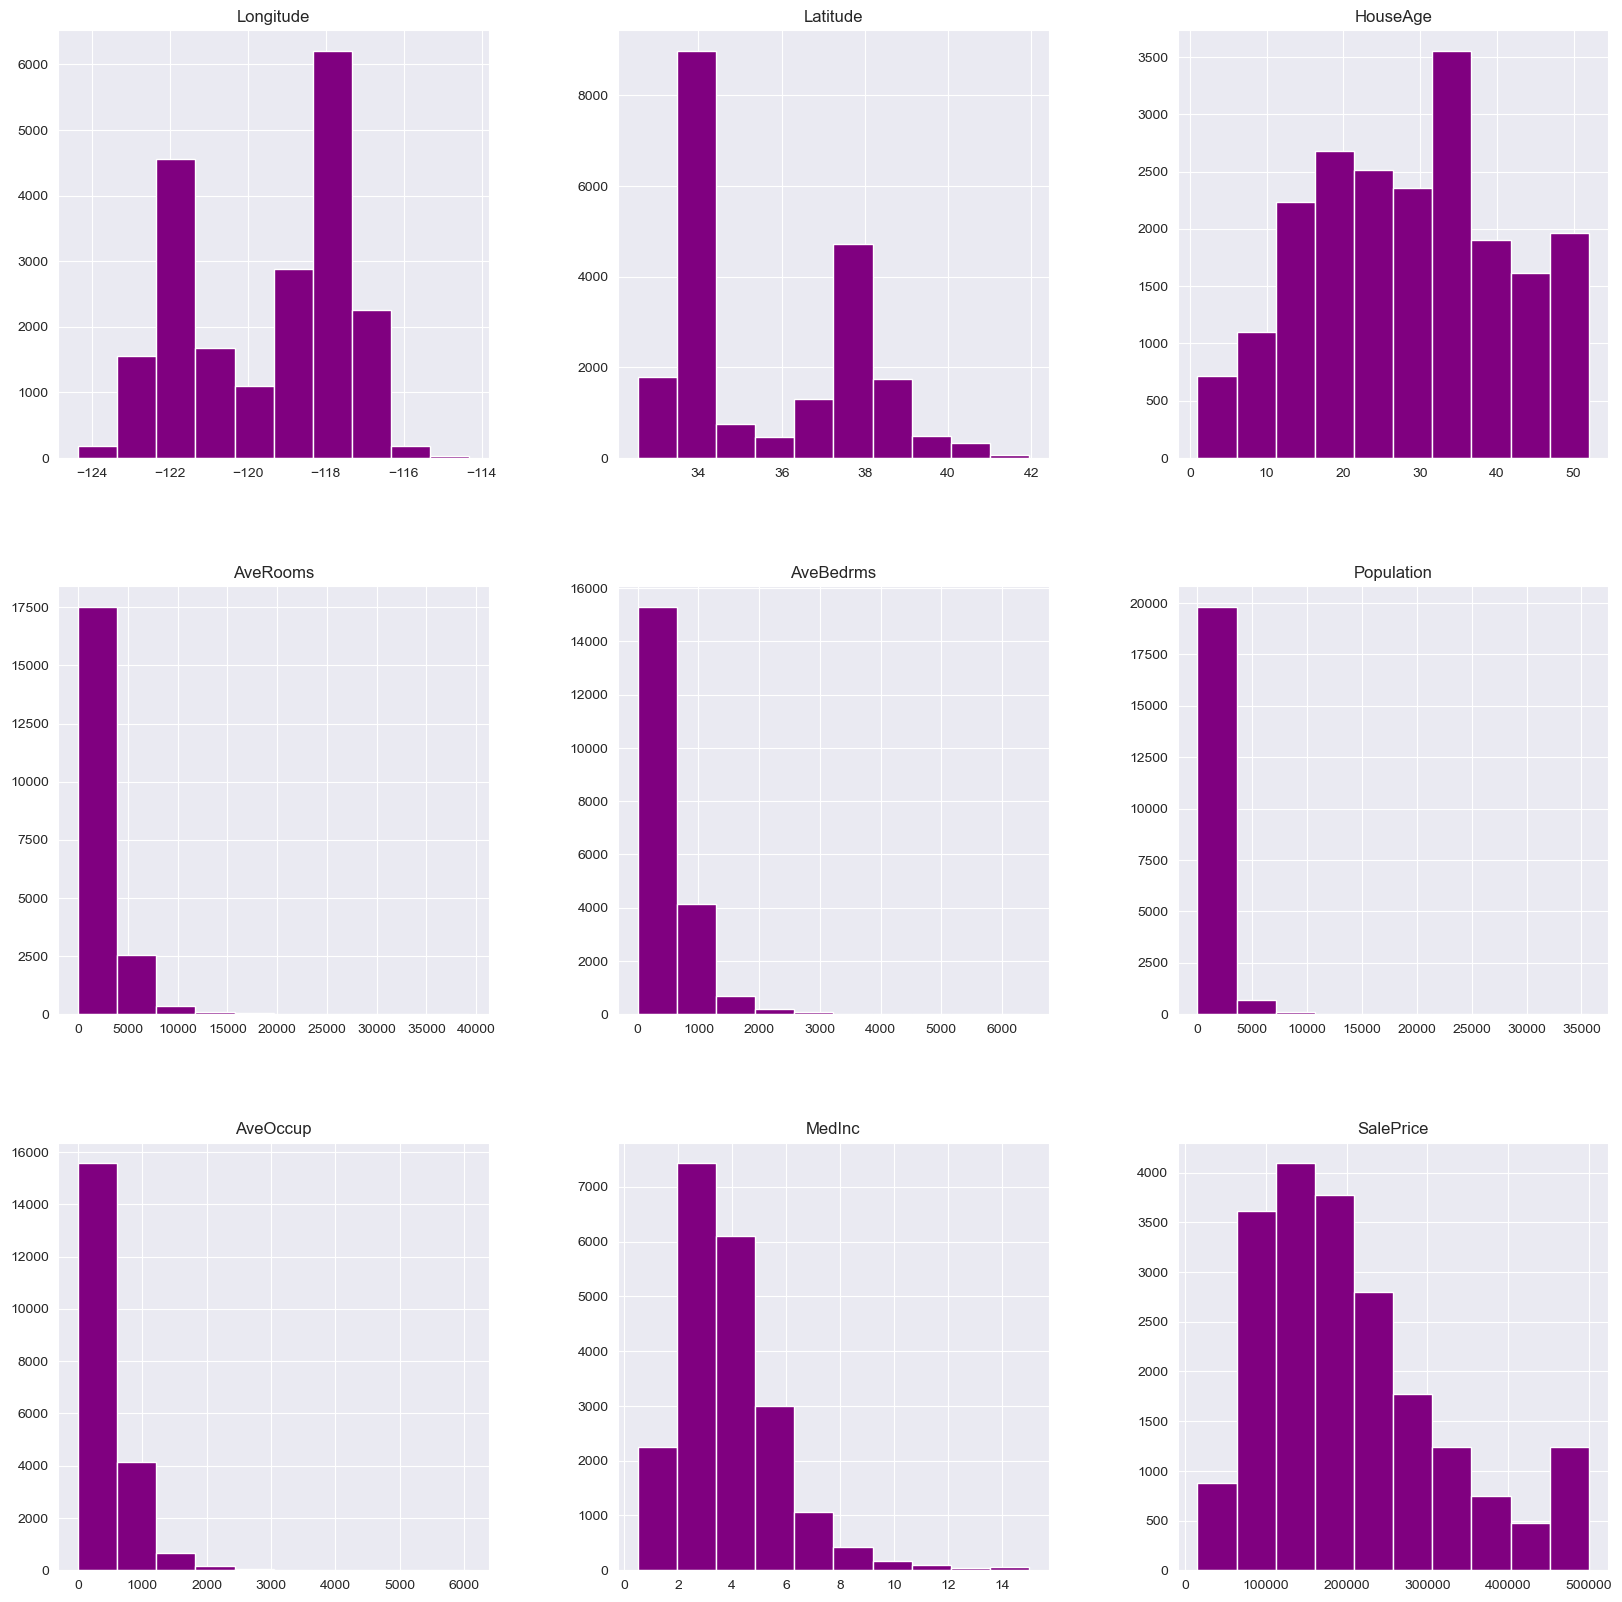

In [5]:
housingDf.hist(figsize=(20, 20), color = 'purple');

Text(0.5, 0.98, 'Desired Histograms')

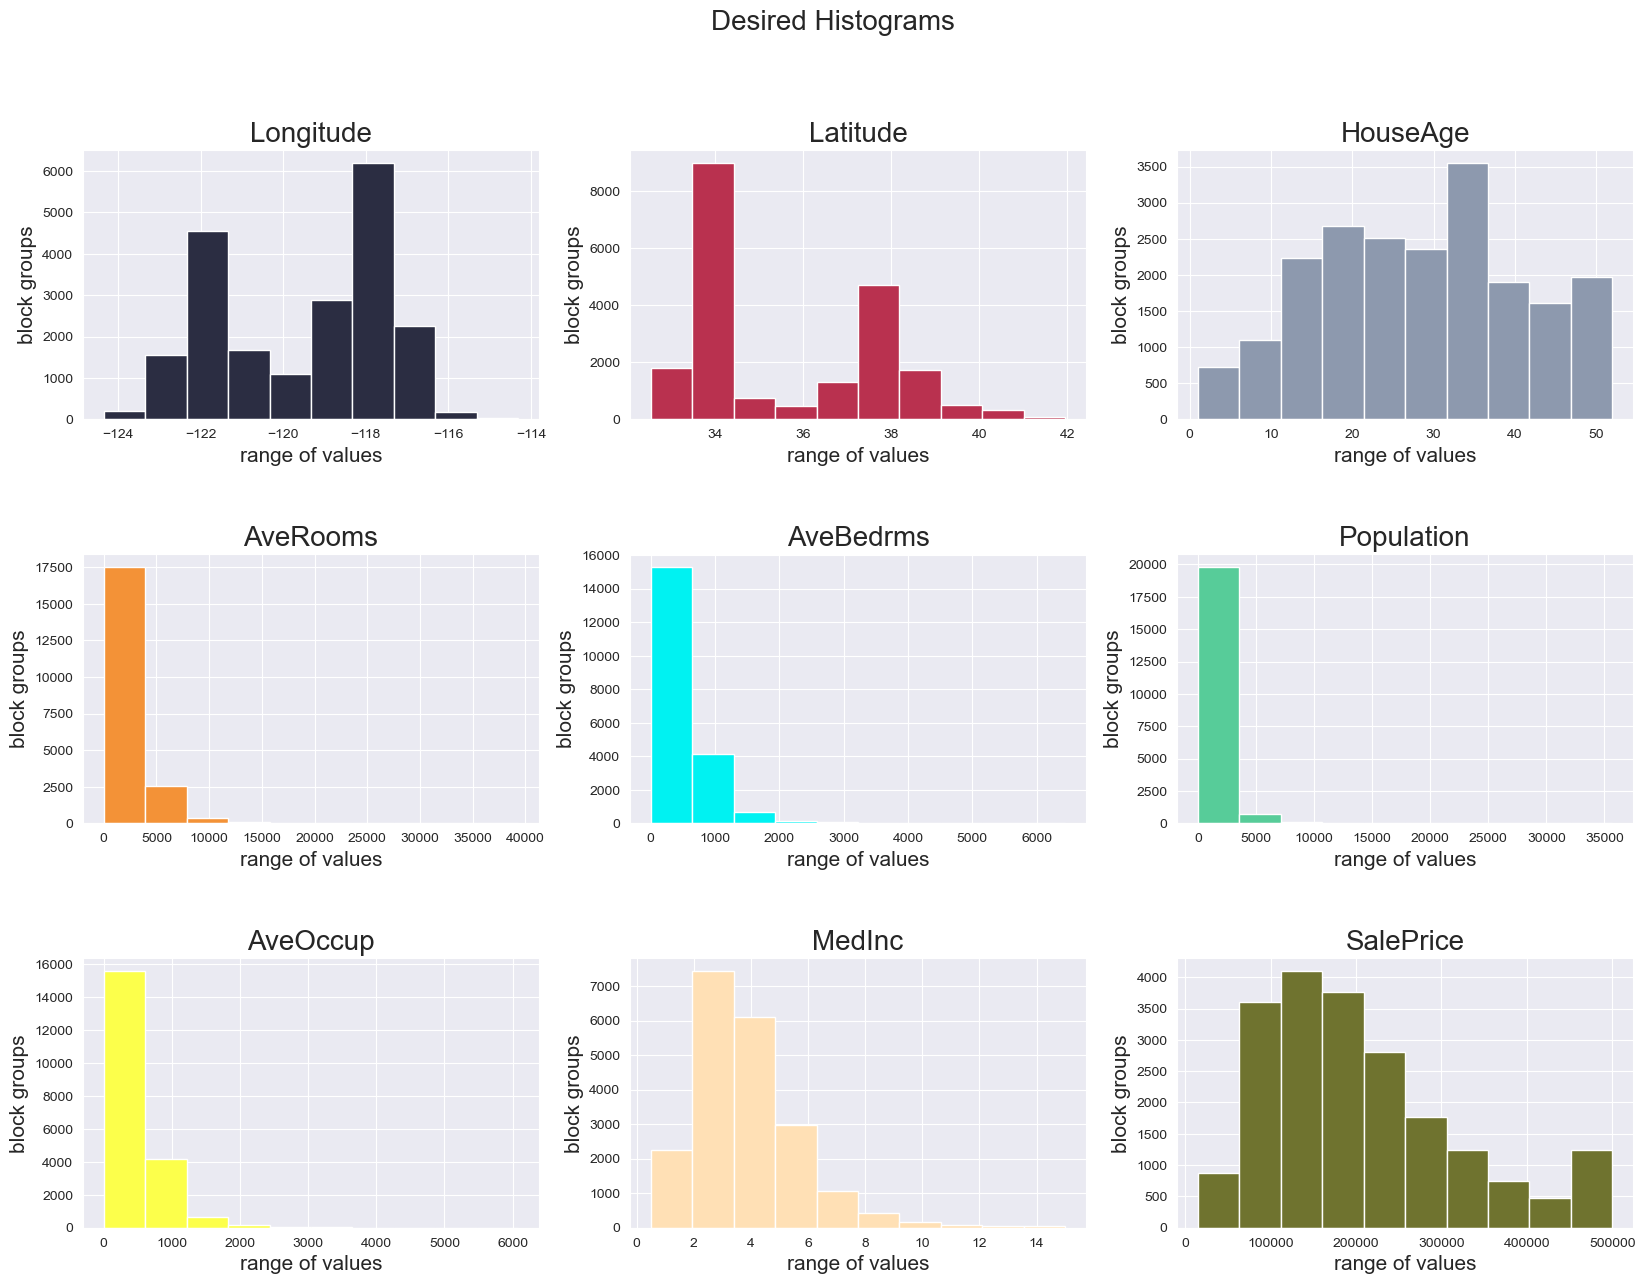

In [6]:

fig, axes = plt.subplots(nrows = 3, ncols =3, figsize = (20, 14))
fig.subplots_adjust(hspace = 0.5)
colors = ["#2B2D42", "#B9314F", "#8D99AE", "#F39237","#00F2F2","#57CC99","#FCFF4B","#FFE0B5","#6F732F"]
for index, column in enumerate(housingDf.columns):
    ax = axes.flatten()[index]
    ax.hist(housingDf[column],color = colors[index], label = column)
    ax.set_title(column, size = 20)
    ax.set_xlabel("range of values", size = 15)
    ax.set_ylabel("block groups", size = 15)
plt.suptitle("Desired Histograms", size = 20)

#### Take a closer look at the histogram of SalePrice. Redo it with 20, 50 and then 100 bins (3 histograms side by side).

Text(0.5, 1.0, 'SalePrice 100 bins')

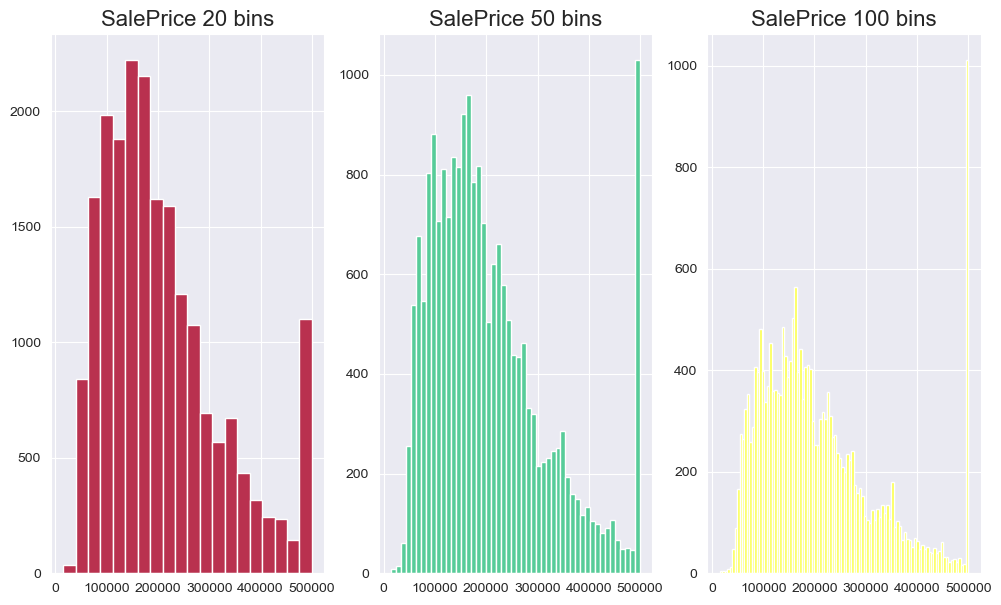

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
housingDf['SalePrice'].hist(bins=20,figsize=(12,7), color= colors[1], ax = ax1)
ax1.set_title("SalePrice 20 bins", fontsize=16)

housingDf['SalePrice'].hist(bins=50,figsize=(12,7), color= colors[5],ax = ax2)
ax2.set_title("SalePrice 50 bins", fontsize=16)

housingDf['SalePrice'].hist(bins=100,figsize=(12,7), color= colors[6],ax = ax3)
ax3.set_title("SalePrice 100 bins", fontsize=16)


## Do you think there are really about 1000 houses with SalePrice exactly equal to 500001?

### no there are more than 1000 they just optimized for the data set and made a limited set the the max prcie can be 500001

## What do you think the original data looked like?

### the original data looked more spread over a larger range and the limit of the hosing price is much higher

## What has been done to the highest prices before recording them in the file?

### each one of the higher prices has been reduced to be maximum value of 500001

### Now lets explore the relationships between pairs of variables.

#### First make a scatter plot with Longitude on the x axis and Latitude on the y axis. Colour the dots (hue) according to SalePrice. Choose a palette that shows the difference between the colours clearly.

Text(13.319444444444445, 0.5, 'Latitude')

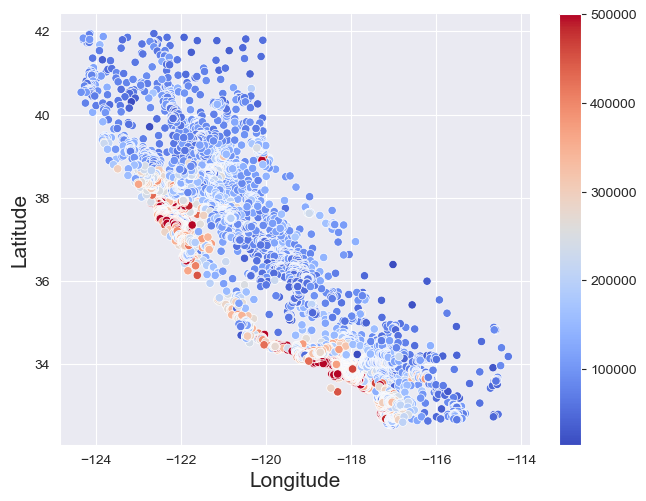

In [8]:
ax = sns.relplot(data=housingDf, x=housingDf["Longitude"], y=housingDf["Latitude"],
            hue='SalePrice',aspect=1,palette="coolwarm",legend=False)
norm = plt.Normalize(housingDf['SalePrice'].min(), housingDf['SalePrice'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm)
ax.figure.set_size_inches(7,5)
plt.xlabel('Longitude', size=15)
plt.ylabel('Latitude', size=15)

#### Now something cool - run the next cell...

In [9]:
from IPython.display import HTML
HTML('<iframe src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d6509916.957423575!2d-123.79759793610344!3d37.18430344877116!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x808fb9fe5f285e3d%3A0x8b5109a227086f55!2sCalifornia%2C%20USA!5e0!3m2!1sen!2sil!4v1612700305502!5m2!1sen!2sil" width="800" height="600" frameborder="0" style="border:0;" allowfullscreen="" aria-hidden="false" tabindex="0"></iframe>')

## Where are the prices generally higher?

### the prices are higher in Los Angeles and San Francisco areas, we can also see a bit of a change the closer you are to the see

## Make a heatmap showing the correlations between the rest of the variables

<AxesSubplot: >

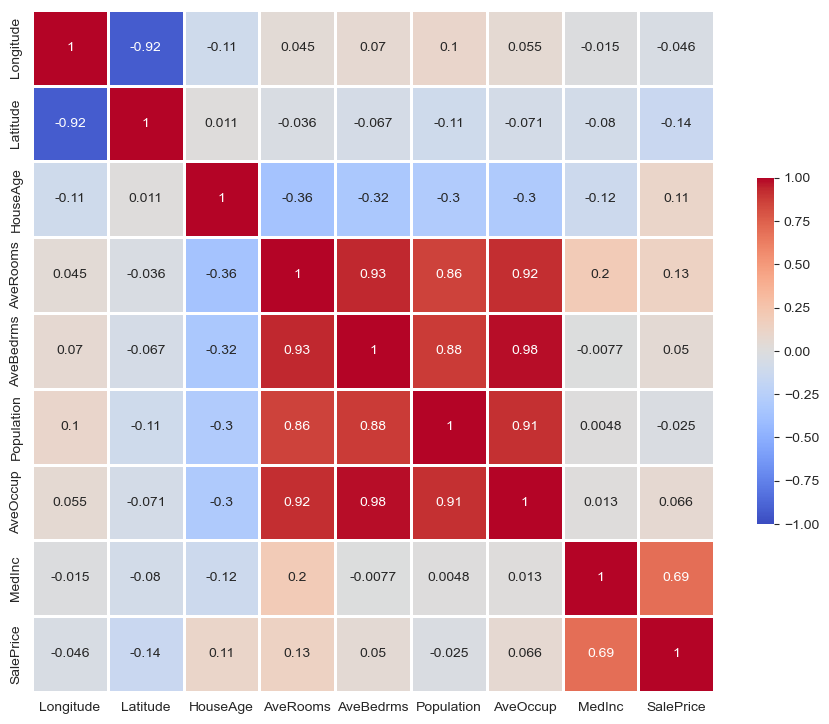

In [10]:
corr = housingDf.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap='coolwarm',vmin=-1, vmax=1, center=0,
            square=True, linewidths=-1, cbar_kws={"shrink": .5},annot=True)

## Which variables will we want to use to predict Sale Price? Are there any you can drop?

### we have 3 variables and to improve our model we can remove 2 of them, we can choose between: AveOccup, Population, AveBedrms

## Split the Data and Scaling

### Use train_test_split with proportion 70:30 between train and test sets. Use random_state = 10

In [11]:
housingDf = housingDf.dropna()
X= housingDf[['AveBedrms','Longitude','Latitude','HouseAge','AveRooms','MedInc']].values
y = housingDf['SalePrice'].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 10)

## Linear Regression

#### Fit the model and print the coefficients and intercept

In [13]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X,y)
lreg.fit(X_train, y_train)
a,b =(lreg.coef_[0],lreg.intercept_)
print ("intercept :" , str(lreg.intercept_))
print('coefficients :' ,lreg.coef_)

intercept : -3493579.0128046256
coefficients : [ 1.01846689e+02 -4.09635147e+04 -3.95926414e+04  1.23934229e+03
 -1.56383824e+01  4.24559077e+04]


### Predictions

#### Predict the SalePrice on the test set. Make a scatter plot with actual prices on the x axis and predicted values on the y axis

Text(0.5, 1.0, 'Actual vs Predicted Price')

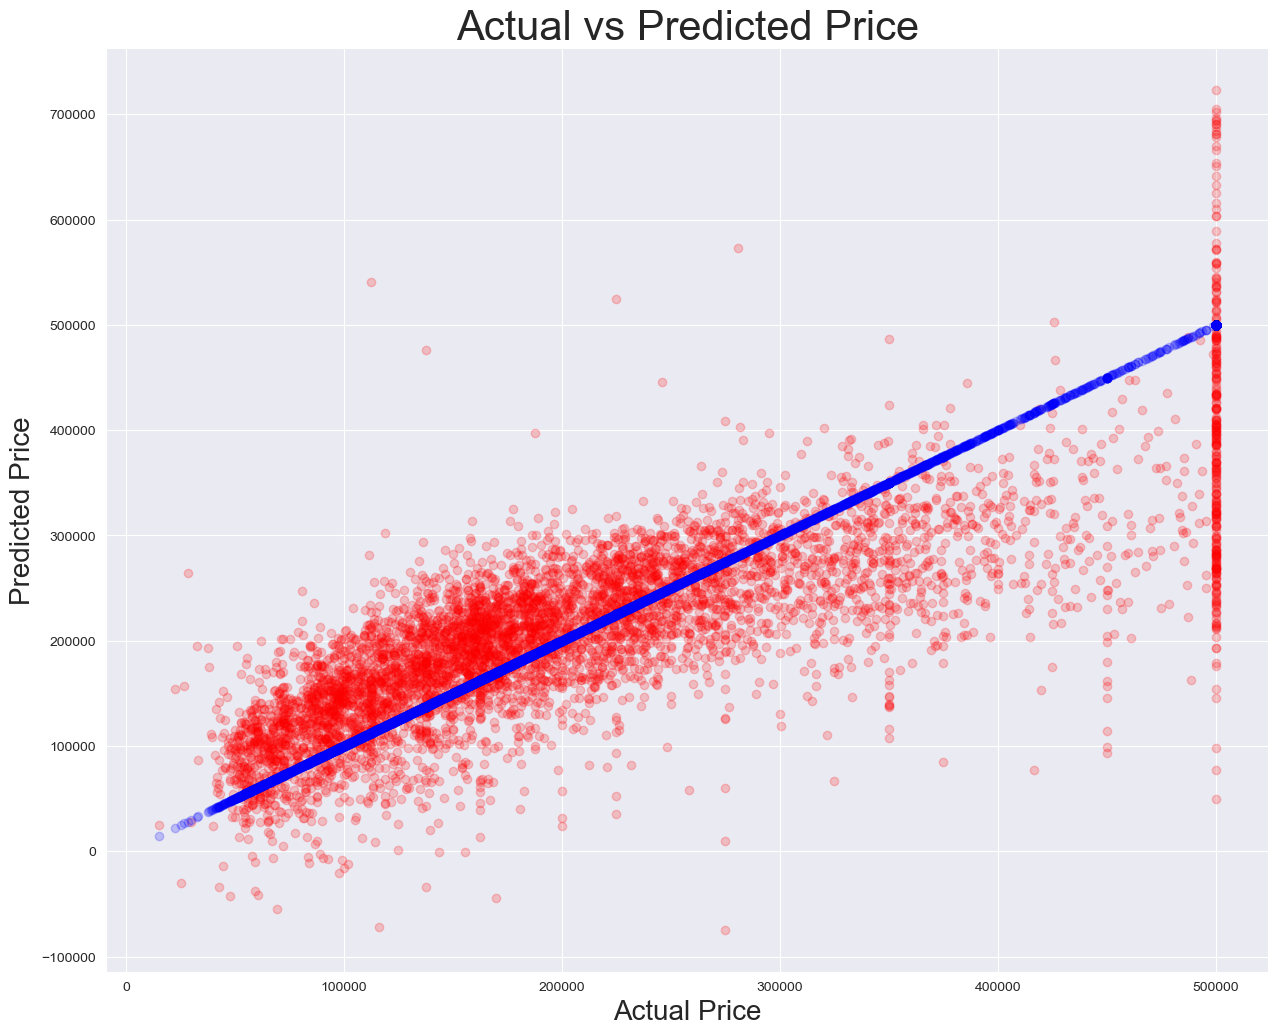

In [14]:
y_train_pred = lreg.predict(X_train)
test_pred = lreg.predict(X_test)
heu = [y_train_pred, test_pred]
plt.figure(figsize=(15,12))
plt.scatter(y_test, test_pred, color='red', alpha=0.2, label='Predicted')
plt.scatter(y_test, y_test, color='blue', alpha=0.2, label='Actual')

plt.xlabel('Actual Price', size = 20)
plt.ylabel('Predicted Price', size= 20)
plt.title('Actual vs Predicted Price', size =30)


### Residuals

#### Show the distribution plot of the residuals (histogram with density)

Text(0, 0.5, 'residuals')

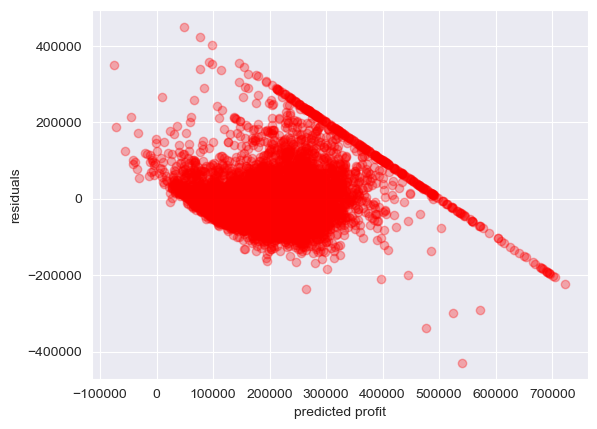

In [15]:
y_test_pred = lreg.predict(X_test)
resid = y_test-y_test_pred
plt.scatter(y_test_pred,resid, color = 'r',alpha = 0.3)
plt.hlines(y=0, xmin=2,xmax=15)
plt.xlabel('predicted profit')
plt.ylabel('residuals')

<AxesSubplot: ylabel='Count'>

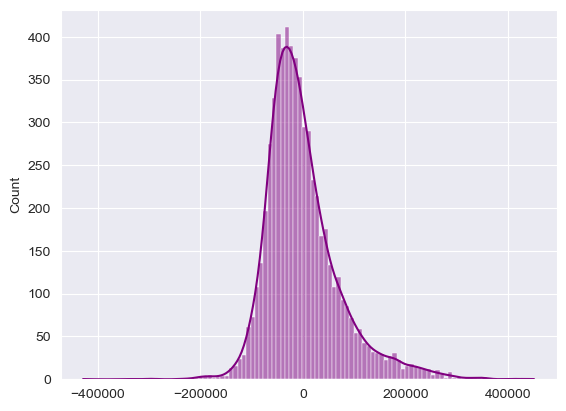

In [16]:
sns.histplot(resid, kde=True, color = 'purple')

### Evaluation

#### Calculate MAE, MSE, RMSE and R squared

In [17]:
#by Population
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("MSE: ", mse," RMSE: ", rmse," MEA: ",mae," R**2", r2)

MSE:  5240641241.023194  RMSE:  72392.27335167196  MEA:  53102.79442755571  R**2 0.6035630878913307


# Conclusion

# What can we learn about the model from the residual distribution?

## we can learn that the AveBedrms column have a lot of affect on the prediction of the SalePrice of the household
